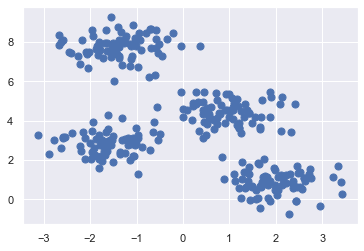

In [7]:
import numpy as np
import seaborn as sns ; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets._samples_generator import make_blobs, make_biclusters
X, y_true= make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0],X[:,1], s=50)

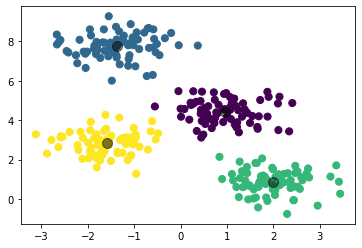

In [2]:
#assign four clusters
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)


#import library
from sklearn.metrics import pairwise_distances_argmin

#funtion to determinate centers
def find_clusters(X,n_clusters, rseed=2):
    rng=np.random.RandomState(rseed)
    i=rng.permutation(X.shape[0])[:n_clusters]
    centers=X[i] 

    while True:
        labels=pairwise_distances_argmin(X,centers)
        new_centers=np.array([X[labels==i].mean(0)
                            for i in range (n_clusters)])
        if np.all(centers==new_centers):
            break
        centers=new_centers
    return centers,labels


#using the funtion and plot the results
centers, labels=find_clusters(X,4) 
plt.scatter(X[:,0],X[:,1], c=labels,
            s=50, cmap='viridis')
plt.scatter(centers[:,0],centers[:,1], c='black', s=100, alpha=0.5)

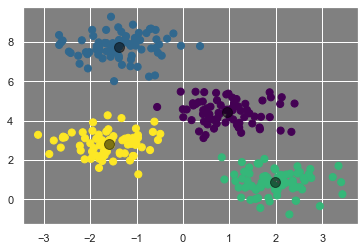

In [17]:
centros=kmeans.cluster_centers_

plt.axes().set_facecolor('grey')
plt.scatter(X[:,0],X[:,1], c=labels,
            s=50,cmap='viridis' )
for point in centros:
    plt.scatter(point[0],point[1], c='black', s=100, alpha=0.5)